In [1]:
!git clone https://github.com/pvalle6/Fly_Swatter

Cloning into 'Fly_Swatter'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 85 (delta 43), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (85/85), 148.92 KiB | 4.14 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
import numpy as np
import scipy
import time
import sched
import random

In [3]:
missile_speed = 2

In [4]:
from Fly_Swatter.Fly_Swatter import radar
#from Fly_Swatter.Fly_Swatter import search
from Fly_Swatter.Fly_Swatter import target
# probably going to have to create a differential equation solver for this one

first_loc, second_loc = radar.generate_random_vector(2)


In [5]:
print(second_loc.tell())

Phi: 0.6383185307179586  Theta: 1.423716694115407 Rho: 2.01


In [6]:
deltaT, deltaXYZ, xyz_one, xyz_two = target.calculate_trajectory_target(first_loc, second_loc)

guess_solution = xyz_two
solution = xyz_two # need to replace this time factor with a better estimation

solution = scipy.optimize.fsolve(target.find_firing_solution, guess_solution, args=(deltaXYZ, xyz_two, missile_speed))

In [7]:
solution

array([1.0662552 , 0.74079165, 1.5109215 ])

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def graph_solution(missile_speed, phi, theta, deltaXYZ_target, xyz_target, time):

  mx, my, mz = target.calculate_ballistics_missile(missile_speed, phi, theta)
  tx, ty, tz = xyz_target
  dtx, dty, dtz = deltaXYZ_target

  fig = plt.figure()
  ax = plt.axes(projection='3d')

  #ax.set_xlim(xmin=-2, xmax=2)
  #ax.set_ylim(ymin=-2, ymax=2)
  #ax.set_zlim(zmin=0, zmax=2)


  txline = np.linspace(tx,tx + dtx * 1000, 1000)
  tyline = np.linspace(ty,ty + dty, 1000)
  tzline = np.linspace(tz,tz + dtz, 1000)

  mxline = np.linspace(0,mx,100)
  myline = np.linspace(0,my,100)
  mzline = np.linspace(0,mz,100)


  ax.legend()

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

  ax.plot3D(txline, tyline, tzline, 'grey', label='Target Trajectory')
  ax.plot3D(mxline, myline, mzline, 'red', label='Missile Trajectory')

  ax.legend()
  plt.show()

In [18]:
print(xyz_two)

[0.17551555466546967, 1.1847195554932952, 1.6142285664992553]


In [19]:
print(deltaXYZ)

[-0.0838418833635074, 0.23622274567200785, -0.03805422250639623]


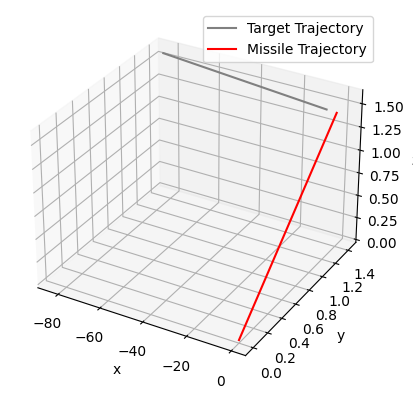

In [20]:
graph_solution(missile_speed, solution[1], solution[2], deltaXYZ, xyz_two, deltaT)